In [35]:
%run ego.py

In [2]:
from sklearn.preprocessing import StandardScaler

data = np.genfromtxt("dat_train.txt")

scaler = StandardScaler()
scaled = scaler.fit_transform(data)

X = scaled[:,1:]
y = scaled[:,0].reshape((-1,1))

IOError: dat_train.txt not found.

In [393]:
sig = np.ones(X.shape[1])

krig = Kriging(sig)
krig.fit(X, y)

In [394]:
np.sum((krig.yhat(X) - y)**2)

0.36149566701562236

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(krig.yhat(X), y)


NameError: name 'krig' is not defined

In [396]:
x_in = np.random.rand(9)
y_out = krig.yhat(x_in)
f_out = krig.f(x_in)
print f_out
print x_in.shape, y_out[0]
print scaler.inverse_transform(np.concatenate((y_out[0], x_in)))[0]

[[ 0.69299723]]
(9L,) [-0.0411379]
32770.821434


In [397]:
krig.yhat(np.random.rand(9))

array([[ 0.10374296]])

In [398]:
len(x_in)

9

(39L, 10L)


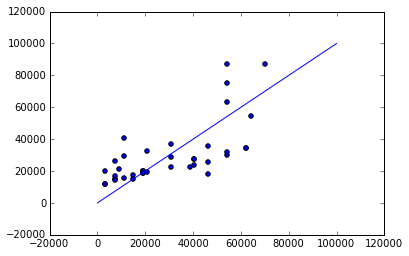

In [399]:
#import the test data
test = np.genfromtxt("dat_test.txt") 
print test.shape
test_scaled = scaler.transform(test)
Xt = test_scaled[:,1:]
#print test[:,1:].mean(axis=0)
yt_scale = test_scaled[:,0]
yt = test[:,0]

yt_out = scaler.inverse_transform(np.column_stack((Xt, krig.yhat(Xt))))[:,0]
plt.scatter(yt_out, yt)
plt.plot(np.linspace(0,100000), np.linspace(0,100000))

In [400]:
np.sqrt(np.sum((yt_out - yt)**2))

96993.812594581846

In [385]:
# sig = np.eye(X.shape[1])
# sig = np.diag(np.random.rand(X.shape[1]))
# krig2 = Kriging(sig)
# obj = 0.
# krig2.fit(X[:1],y[:1])

# for i,x in enumerate(X,2):
#     #print i
#     f_current = krig2.f(x)
#     krig2.fit(X[:i-1],y[:i-1])
#     #f_current = krig2.f(x)
#     #print f_current[0,0]
#     obj += np.nan_to_num(f_current[0,0])
# print obj
    

In [402]:
#krig.obj(np.ones(X.shape[1]))

krig.obj(np.random.rand(X.shape[1]))

194.2196137835094

In [389]:
np.diag(1/np.random.rand(X.shape[1]))

array([[ 3.49775567,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.93960088,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.08966216,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  9.0516656 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.55975495,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         6.9033417 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.33312554,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [4]:
from sklearn.externals import joblib

In [5]:
%run preprocess.py

In [9]:
pre = Preprocess(pca_model='eco_full_pca.pkl')
pre.get_json("alluser_control.json")

In [60]:
#pre.train_pca()
X, y = pre.ready_player_one(2)

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)

In [61]:
X.shape

(33, 30)

In [62]:
rKrig = Kriging(np.ones(30)/10.)
rKrig.fit(X,y)


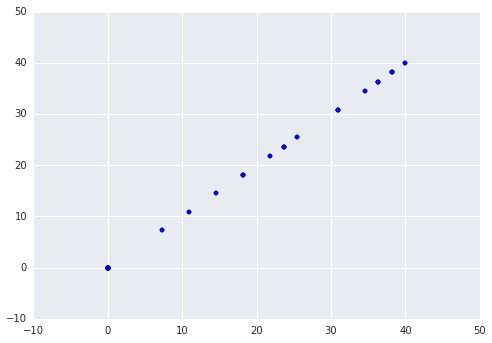

In [63]:
plt.scatter(rKrig.yhat(X), y)

In [64]:
err =np.abs(rKrig.yhat(X) - y)
np.sum(err>0.01)

0

In [65]:
np.argmax(err)

15

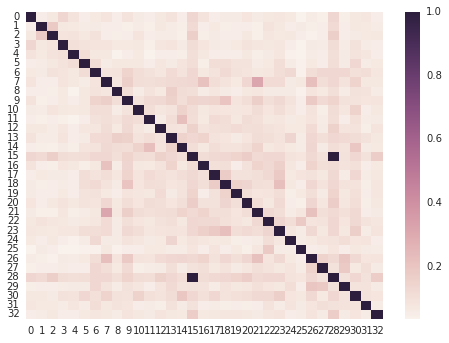

In [66]:
import seaborn as sns
sns.heatmap(rKrig.R)

In [95]:
scores = []
for i in np.logspace(-10, 55, num=100, base=2):
    scores += [rKrig.obj(np.ones(30)/i)]

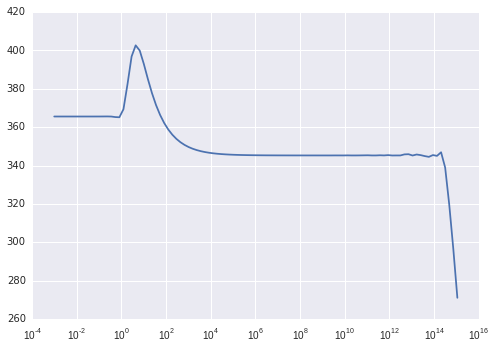

In [96]:
plt.semilogx(np.logspace(-10, 50, num=100, base=2), scores)

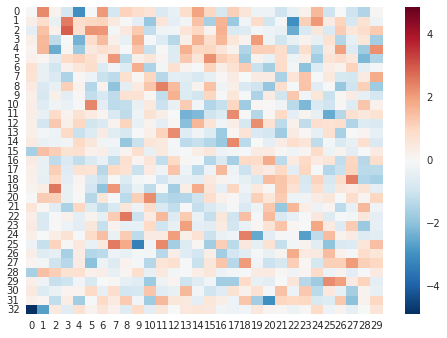

In [68]:
sns.heatmap(X)

In [46]:
pre.pca.inverse_transform(X[156])

array([[-0.01880987,  0.0049436 , -0.00129515, ..., -0.0251352 ,
        -0.0251352 , -0.02513379]])

In [49]:
(X[156]-X[157]), y[156],y[157]

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]), 0.0, 40.000000000000007)

In [54]:
pre.all_dat.shape

(2391, 18160)

In [58]:
top6 = [78, 122, 166, 70, 67, 69] #best players
m1, m2, m3, m4, m5, m6 = [pre.full_tab.userid.values==i for i in top6]
masks = [m1, m2, m3, m4, m5, m6]
p1=pre.all_dat[masks[0]]
p1_score=pre.full_tab["rem_nrg"].values[masks[0]]

##### 

In [59]:
np.sum(np.abs(p1[157] - p1[156]))

0.0